# LEAD SCORE CASE STUDY

In [876]:
# Importing all necessary Libraries
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

### Importing the Leads dataset

In [878]:
leads_df = pd.read_csv('Leads.csv')
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Analysing the columns of the table for discrepensies

In [880]:
leads_df.shape

(9240, 37)

In [881]:
leads_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [882]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data Cleansing

In [884]:
#checking info to find whether null values are present or not
leads_df.isnull().sum().sort_values()

Prospect ID                                         0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
A free copy of Mastering The Interview              0
Magazine                                            0
Search                                              0
Newspaper Article                                   0
Last Notable Activity                               0
Lead Number                                         0
Lead Origin                                         0
Total Time Spent on Website                         0
Converted                                           0
Do Not Call                 

Our dataset has a total of around 9000 columns.As we can see the columns above some are having more than 3000 null values which is more than 25% of total and are of no use in the analysis to our models. So we are dropping them.

In [886]:
#Keeping only the coulmns that are having null values less than 3000
leads_df = leads_df.loc[:,leads_df.isnull().sum() <= 3000]

In [887]:
leads_df.isnull().sum().sort_values()

Prospect ID                                         0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
Newspaper Article                                   0
Magazine                                            0
Search                                              0
A free copy of Mastering The Interview              0
Last Notable Activity                               0
Do Not Call                                         0
Total Time Spent on Website                         0
Converted                                           0
Do Not Email                                        0
Lead Origin                 

In [888]:
# Most of the data must be from India, So checking the values of city and country column to get what is the lead in them and
#dropping them for ease of analysis
leads_df['Country'].value_counts(dropna=False)

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

In [889]:
leads_df['City'].value_counts(dropna=False)

City
Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

##### Clearly Country 'India' and City 'Mumbai' are the leads in their respective columns.

In [891]:
#dropping them
leads_df.drop(['City'], axis = 1, inplace = True)
leads_df.drop(['Country'], axis = 1, inplace = True)

In [892]:
#Now checking percentage of missing values in each column
round(100*(leads_df.isnull().sum()/len(leads_df.index)),2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

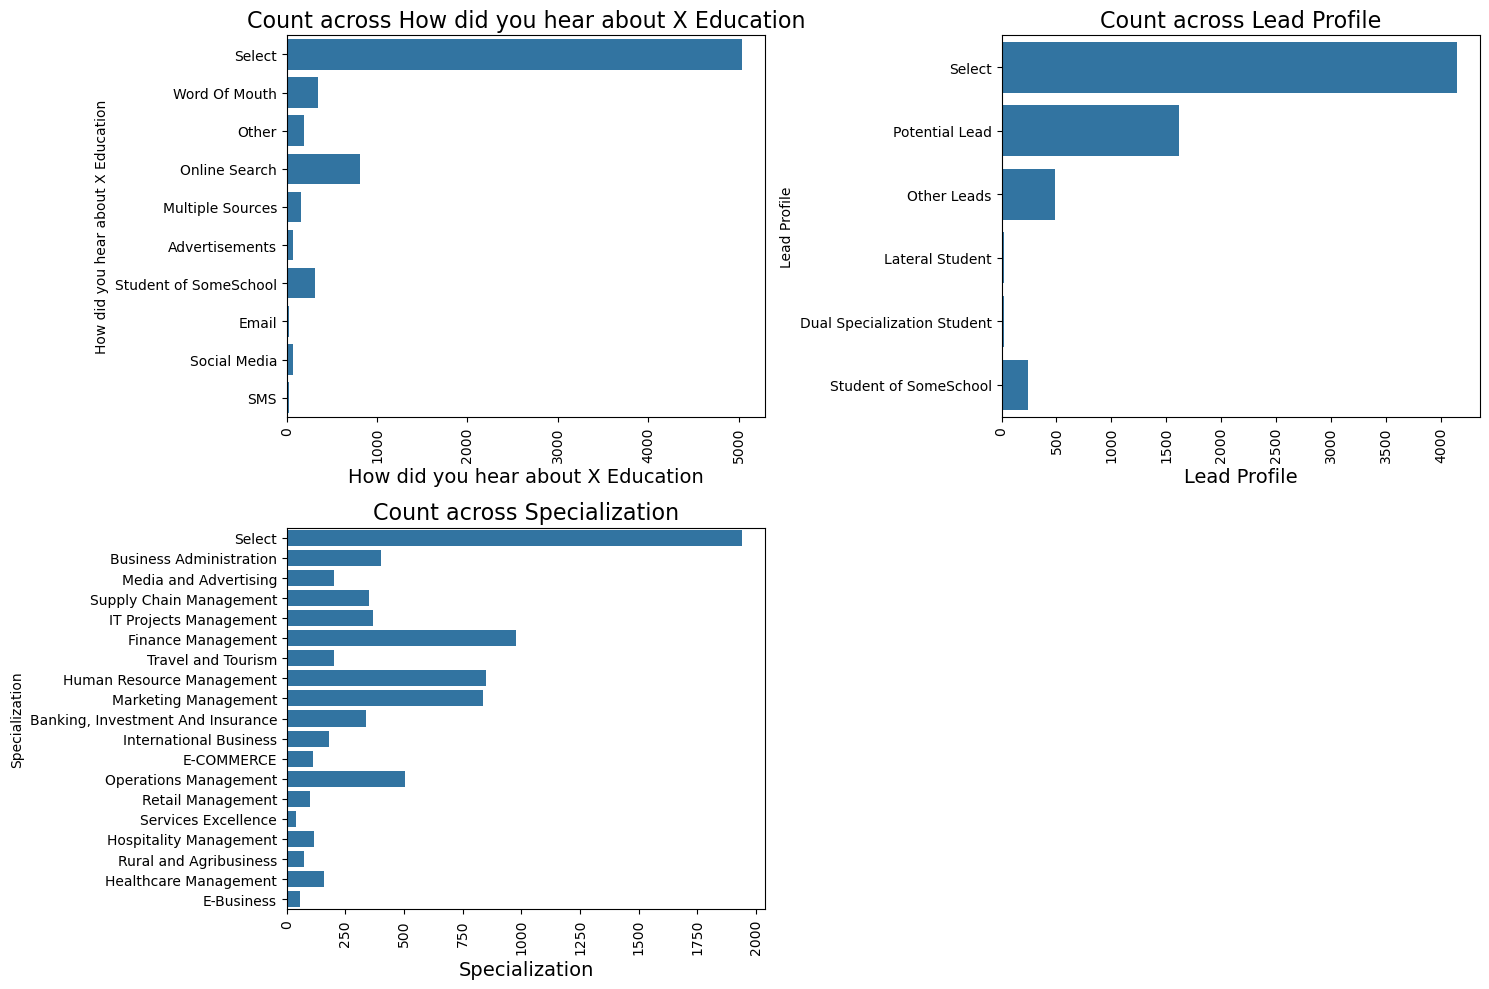

In [893]:
def countplot(x, fig):
    plt.subplot(2,2, fig)
    sns.countplot(leads_df[x])
    plt.title('Count across'+' '+ x, size = 16)
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90)

plt.figure(figsize=(15,10))

countplot('How did you hear about X Education',1)
countplot('Lead Profile',2)
countplot('Specialization',3)



plt.tight_layout()

In [894]:
for column in leads_df.columns:
    print(f"Value counts for '{column}':")
    print(leads_df[column].value_counts(dropna=False))
    print("\n")

Value counts for 'Prospect ID':
Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64


Value counts for 'Lead Number':
Lead Number
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: count, Length: 9240, dtype: int64


Value counts for 'Lead Origin':
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64


Va

From above we can identify that some columns have their values as 'Select' which means the user haven't selected any option for that paritcular value and left blank. So dropping columns 'Lead profile' and 'How did you hear about X Education' which have more than 4000 select values

In [896]:
leads_df.drop(['Lead Profile','How did you hear about X Education'], axis = 1, inplace = True)

While seeing the above we can find that some of the columns direclt means 'NO' like 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'. So we are dropping them as there of no use to our analysis

In [898]:
#Dropping above mentioned columns
leads_df.drop(['Do Not Call','Magazine','Newspaper Article', 'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
               'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
               'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [899]:
leads_df.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
What is your current occupation                  2690
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Do Not Email                                        0
Converted                                           0
Total Time Spent on Website                         0
Search                                              0
A free copy of Mastering The Interview              0
Last Notable Activity                               0
dtype: int64

In [900]:
leads_df['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [901]:
#Therefore Dropping 'What matters most to you in choosing a course' column as it has more null values and most of answers are 'Better Career Prospects'
leads_df.dropna(subset = ['What matters most to you in choosing a course'])
leads_df = leads_df[leads_df['What matters most to you in choosing a course'] != 'Other']
leads_df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,Select,Unemployed,Better Career Prospects,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.50,Email Opened,Select,Unemployed,Better Career Prospects,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Better Career Prospects,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,Select,Unemployed,Better Career Prospects,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,Unemployed,Better Career Prospects,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,Better Career Prospects,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,Better Career Prospects,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,NaN,NaN,No,No,SMS Sent


In [902]:
# Checking the percent of lose if the null values are removed
round(100*(sum(leads_df.isnull().sum(axis=1) > 1)/leads_df.shape[0]),2)

30.72

In [903]:
#Removing null values from dataframe
final_leads_df = leads_df[leads_df.isnull().sum(axis=1)<1]

In [904]:
#Checking if null values are still present in df
round(100*(final_leads_df.isnull().sum()/len(final_leads_df.index)),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
A free copy of Mastering The Interview           0.0
Last Notable Activity                            0.0
dtype: float64

In [905]:
# Encountering errors to convert string to float for analysis or visualization. So converting Yes or No values to 1 and 0.
# And also converting 'what matters most to you in choosing a course' column the same since it has only 2 values
final_leads_df.replace({'Yes': 1, 'No': 0}, inplace=True)
final_leads_df.replace({'Better Career Prospects' : 1, 'Flexibility & Convenience': 0}, inplace=True)

In [906]:
# Dropping Prospect ID column since it has unique value for all user
final_leads_df = final_leads_df.drop('Prospect ID', axis = 1)
final_leads_df.shape

(6371, 15)

In [907]:
#Checking number of percentage of columns retained after removing null values
round(100*(final_leads_df.shape[0])/(leads_df.shape[0]),2)

68.96

We got around 69% retention of the original data which is good to go ahead with the analysis

## Creating Dummy Variables

In [910]:
#Creating dummy variables
dummy_df = pd.get_dummies(final_leads_df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']],drop_first = True)
dummy_df = dummy_df.astype(int)

In [911]:
#Adding dummy variable to master dataframe
final_leads = pd.concat([final_leads_df,dummy_df], axis = 1)
final_leads.head(15)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,API,Olark Chat,0,0,0.0,0,0.00,Page Visited on Website,Select,...,0,0,0,1,0,0,0,0,0,0
1,660728,API,Organic Search,0,0,5.0,674,2.50,Email Opened,Select,...,1,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.00,Email Opened,Business Administration,...,1,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.00,Unreachable,Media and Advertising,...,0,0,0,1,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.00,Converted to Lead,Select,...,0,0,0,1,0,0,0,0,0,0
6,660673,Landing Page Submission,Google,0,1,2.0,1640,2.00,Email Opened,Supply Chain Management,...,0,0,0,1,0,0,0,0,0,0
10,660608,Landing Page Submission,Organic Search,0,1,8.0,1351,8.00,Email Opened,Travel and Tourism,...,1,0,0,0,0,0,0,0,0,0
11,660570,Landing Page Submission,Direct Traffic,0,1,8.0,1343,2.67,Page Visited on Website,Human Resource Management,...,0,0,0,0,0,1,0,0,0,0
12,660562,API,Organic Search,0,1,11.0,1538,11.00,Email Opened,Marketing Management,...,0,0,0,1,0,0,0,0,0,0
13,660558,Landing Page Submission,Organic Search,0,0,5.0,170,5.00,Email Opened,Business Administration,...,1,0,0,0,0,0,0,0,0,0


In [912]:
#Since the column 'Specialization' has many values as 'select' creating dummy seperately and dropping the select rows
dummy_sp = pd.get_dummies(final_leads['Specialization'], prefix = 'Specialization')
dummy_sp = dummy_sp.drop('Specialization_Select', axis = 1)
dummy_sp = dummy_sp.astype(int)
final_leads = pd.concat([final_leads, dummy_sp], axis = 1)

In [913]:
#Drooping the created dummy variables
final_leads = final_leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity','Specialization'], axis = 1)
final_leads.head(20)

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What matters most to you in choosing a course,Search,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,660737,0,0.0,0,0.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,660728,0,5.0,674,2.50,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.00,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.00,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,660681,1,2.0,1428,1.00,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,660673,1,2.0,1640,2.00,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
10,660608,1,8.0,1351,8.00,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
11,660570,1,8.0,1343,2.67,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12,660562,1,11.0,1538,11.00,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
13,660558,0,5.0,170,5.00,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Test Train Splitting

In [915]:
X = final_leads.drop(['Converted'], axis = 1)
X.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What matters most to you in choosing a course,Search,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,660737,0.0,0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,660728,5.0,674,2.5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,2.0,1532,2.0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,660719,1.0,305,1.0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,660681,2.0,1428,1.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [916]:
#putting target variable
y = final_leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [917]:
#Splitting data into 70-30% for train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 10)

In [918]:
#using MinMaxScaller scaling number features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.replace({'True':1, 'False':0},inplace =True)
X_train.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What matters most to you in choosing a course,Search,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
1967,640577,0.072727,0.495158,0.036364,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2855,632278,0.054545,0.073063,0.054545,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8033,588195,0.036364,0.492518,0.036364,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
9084,580725,0.072727,0.515845,0.072727,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1326,645889,0.090909,0.346831,0.090909,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0


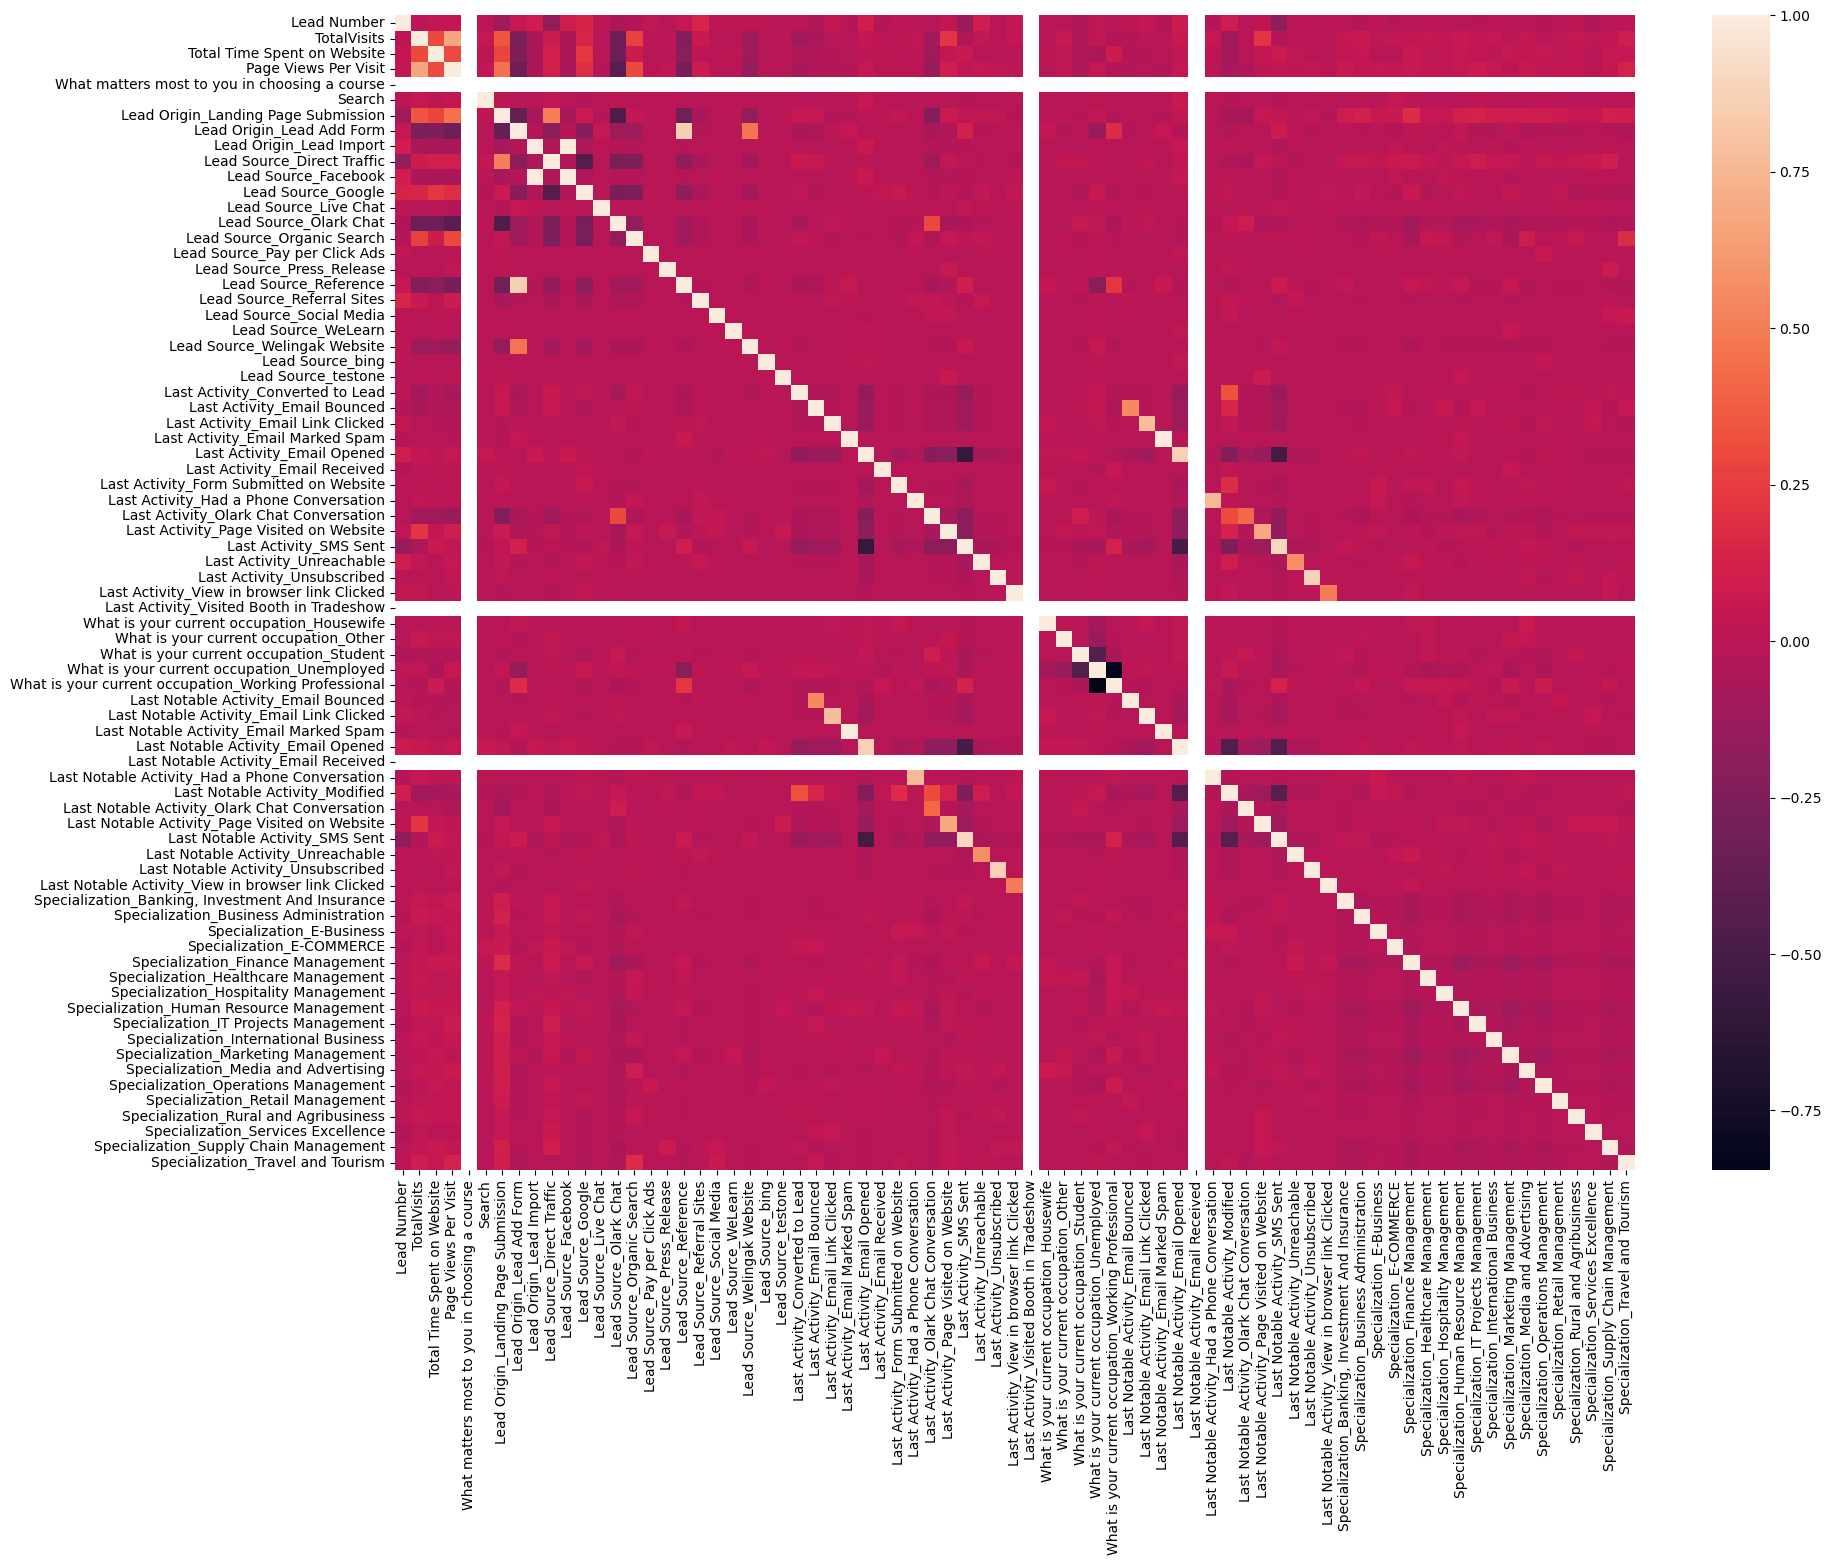

In [919]:
#checking correlation using heatmap
plt.figure(figsize = (20,15))
sns.heatmap(X_train.corr())
plt.show()

## Model Building

In [921]:
#Initiating and selecting 15 variables
log_reg = LogisticRegression()
rfe = RFE(estimator = log_reg, n_features_to_select = 15)
rfe = rfe.fit(X_train,y_train)

In [922]:
#Selected features
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', False, 59),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('What matters most to you in choosing a course', False, 57),
 ('Search', False, 51),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 56),
 ('Lead Source_Direct Traffic', False, 23),
 ('Lead Source_Facebook', False, 58),
 ('Lead Source_Google', False, 26),
 ('Lead Source_Live Chat', False, 47),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 25),
 ('Lead Source_Pay per Click Ads', False, 39),
 ('Lead Source_Press_Release', False, 44),
 ('Lead Source_Reference', False, 2),
 ('Lead Source_Referral Sites', False, 24),
 ('Lead Source_Social Media', False, 29),
 ('Lead Source_WeLearn', False, 41),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 27),
 ('Lead Source_testone', False, 38),
 ('Last Activity_Converted to Lead', Fa

In [923]:
#Assigning all the features selected by RFE
v = X_train.columns[rfe.support_]

All columns selected by RFE are in a variable. Lets find the p-value and VIFs for our statistical part

In [925]:
X_train = X_train[v]

In [926]:
#Import statsmodel
import statsmodels.api as sm

In [927]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4459
Model:                            GLM   Df Residuals:                     4443
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2033.3
Date:                Mon, 18 Nov 2024   Deviance:                       4066.7
Time:                        20:08:55   Pearson chi2:                 4.84e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3769
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4140      0.566     -2.497      0.013      -2.524      -0.304
TotalVisits                                              5.0011      0.819      6.107      0.000       3.396       6.606
Total Time Spent on Website                              4.5650      0.189     24.130      0.000       4.194       4.936
Page Views Per Visit                                    -6.7425      1.497     -4.503      0.000      -9.677      -3.808
Lead Origin_Lead Add Form                                3.6568      0.252     14.504      0.000       3.163       4.151
Lead Source_Olark Chat                                   1.4008      0.136     10.320      0.000       1.135       1.667
Lead Source_Welingak Website                             1.7755      0.761      2.334      0.020       0.285       3.267
Last Activity_Email Bounced                             -1.0922      0.385     -2.838      0.005      -1.847      -0.338
Last Activity_Email Opened                               1.0205      0.107      9.520      0.000       0.810       1.231
Last Activity_Had a Phone Conversation                   2.5953      1.230      2.110      0.035       0.185       5.006
Last Activity_SMS Sent                                   1.8841      0.113     16.659      0.000       1.662       2.106
What is your current occupation_Student                 -1.2853      0.592     -2.170      0.030      -2.446      -0.125
What is your current occupation_Unemployed              -1.5361      0.555     -2.766      0.006      -2.625      -0.448
What is your current occupation_Working Professional     1.2732      0.590      2.157      0.031       0.116       2.430
Last Notable Activity_Had a Phone Conversation          21.2032    1.4e+04      0.002      0.999   -2.75e+04    2.75e+04
Last Notable Activity_Unreachable                        4.0568      1.086      3.736      0.000       1.928       6.185
========================================================================================================================
"""

In [928]:
#For VIF, making VIF dataframe for all the values
vif = pd.DataFrame()
vif['Feautres'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Feautres,VIF
11,What is your current occupation_Unemployed,7.279883
2,Page Views Per Visit,4.869198
0,TotalVisits,3.695434
7,Last Activity_Email Opened,2.705417
9,Last Activity_SMS Sent,2.629028
1,Total Time Spent on Website,2.433845
8,Last Activity_Had a Phone Conversation,2.350539
13,Last Notable Activity_Had a Phone Conversation,2.338250
12,What is your current occupation_Working Profes...,2.068060
3,Lead Origin_Lead Add Form,1.865988


VIF values seems to look good but since P-values are not we are removing 'Last Notable Activity_Unreachable'

#### Model 2 Building

In [931]:
X_train.drop('Last Notable Activity_Unreachable', axis = 1, inplace = True)

In [932]:
# Refitting model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4459
Model:                            GLM   Df Residuals:                     4444
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2047.2
Date:                Mon, 18 Nov 2024   Deviance:                       4094.3
Time:                        20:08:55   Pearson chi2:                 4.86e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3730
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3346      0.557     -2.397      0.017      -2.426      -0.243
TotalVisits                                              4.9317      0.816      6.045      0.000       3.333       6.531
Total Time Spent on Website                              4.5457      0.188     24.152      0.000       4.177       4.915
Page Views Per Visit                                    -6.5529      1.488     -4.405      0.000      -9.469      -3.637
Lead Origin_Lead Add Form                                3.6775      0.252     14.601      0.000       3.184       4.171
Lead Source_Olark Chat                                   1.3825      0.135     10.237      0.000       1.118       1.647
Lead Source_Welingak Website                             1.7440      0.761      2.293      0.022       0.253       3.235
Last Activity_Email Bounced                             -1.1525      0.384     -2.999      0.003      -1.906      -0.399
Last Activity_Email Opened                               0.9565      0.106      9.063      0.000       0.750       1.163
Last Activity_Had a Phone Conversation                   2.5280      1.230      2.056      0.040       0.118       4.938
Last Activity_SMS Sent                                   1.8181      0.111     16.328      0.000       1.600       2.036
What is your current occupation_Student                 -1.3140      0.583     -2.252      0.024      -2.458      -0.170
What is your current occupation_Unemployed              -1.5479      0.546     -2.834      0.005      -2.618      -0.477
What is your current occupation_Working Professional     1.2639      0.582      2.173      0.030       0.124       2.404
Last Notable Activity_Had a Phone Conversation          21.2003    1.4e+04      0.002      0.999   -2.74e+04    2.75e+04
========================================================================================================================
"""

In [933]:
vif2 = pd.DataFrame()
vif2['Feautres'] = X_train.columns
vif2['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif2 = vif2.sort_values(by = 'VIF', ascending = False)
vif2

,Feautres,VIF
11,What is your current occupation_Unemployed,7.254882
2,Page Views Per Visit,4.864721
0,TotalVisits,3.694971
7,Last Activity_Email Opened,2.679435
9,Last Activity_SMS Sent,2.603102
1,Total Time Spent on Website,2.431446
8,Last Activity_Had a Phone Conversation,2.350294
13,Last Notable Activity_Had a Phone Conversation,2.338249
12,What is your current occupation_Working Profes...,2.062544
3,Lead Origin_Lead Add Form,1.863893


P value of 'Last Notable Activity_Had a Phone Conversation' is very high so dropping it

In [935]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

#### Model 3 Building

In [937]:
# Refitting model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4459
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2048.4
Date:                Mon, 18 Nov 2024   Deviance:                       4096.8
Time:                        20:08:55   Pearson chi2:                 4.86e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3727
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3368      0.557     -2.401      0.016      -2.428      -0.246
TotalVisits                                              4.9563      0.814      6.086      0.000       3.360       6.553
Total Time Spent on Website                              4.5427      0.188     24.141      0.000       4.174       4.912
Page Views Per Visit                                    -6.5484      1.486     -4.406      0.000      -9.462      -3.635
Lead Origin_Lead Add Form                                3.6774      0.252     14.599      0.000       3.184       4.171
Lead Source_Olark Chat                                   1.3838      0.135     10.246      0.000       1.119       1.648
Lead Source_Welingak Website                             1.7453      0.761      2.295      0.022       0.255       3.236
Last Activity_Email Bounced                             -1.1515      0.384     -2.997      0.003      -1.905      -0.398
Last Activity_Email Opened                               0.9566      0.106      9.065      0.000       0.750       1.163
Last Activity_Had a Phone Conversation                   3.8805      1.088      3.566      0.000       1.748       6.013
Last Activity_SMS Sent                                   1.8181      0.111     16.330      0.000       1.600       2.036
What is your current occupation_Student                 -1.3130      0.583     -2.251      0.024      -2.456      -0.170
What is your current occupation_Unemployed              -1.5470      0.546     -2.832      0.005      -2.617      -0.477
What is your current occupation_Working Professional     1.2644      0.582      2.174      0.030       0.125       2.404
========================================================================================================================
"""

In [938]:
vif3 = pd.DataFrame()
vif3['Feautres'] = X_train.columns
vif3['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif3 = vif3.sort_values(by = 'VIF', ascending = False)
vif3

,Feautres,VIF
11,What is your current occupation_Unemployed,7.254450
2,Page Views Per Visit,4.864025
0,TotalVisits,3.689819
7,Last Activity_Email Opened,2.679423
9,Last Activity_SMS Sent,2.603050
1,Total Time Spent on Website,2.430871
12,What is your current occupation_Working Profes...,2.062500
3,Lead Origin_Lead Add Form,1.863453
4,Lead Source_Olark Chat,1.708458
5,Lead Source_Welingak Website,1.327031


Now removing the column 'What is your current occupation_Working Professional' for high 

In [940]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

#### Model 4 Building

In [942]:
# Refitting model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4459
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2050.5
Date:                Mon, 18 Nov 2024   Deviance:                       4101.0
Time:                        20:08:56   Pearson chi2:                 4.81e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3721
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.2002      0.222     -0.903      0.366      -0.635       0.234
TotalVisits                                    4.8993      0.815      6.010      0.000       3.301       6.497
Total Time Spent on Website                    4.5428      0.188     24.145      0.000       4.174       4.912
Page Views Per Visit                          -6.5464      1.487     -4.402      0.000      -9.461      -3.632
Lead Origin_Lead Add Form                      3.6742      0.252     14.591      0.000       3.181       4.168
Lead Source_Olark Chat                         1.3798      0.135     10.224      0.000       1.115       1.644
Lead Source_Welingak Website                   1.7433      0.760      2.292      0.022       0.253       3.234
Last Activity_Email Bounced                   -1.1391      0.383     -2.974      0.003      -1.890      -0.388
Last Activity_Email Opened                     0.9635      0.106      9.125      0.000       0.757       1.170
Last Activity_Had a Phone Conversation         3.8904      1.088      3.577      0.000       1.759       6.022
Last Activity_SMS Sent                         1.8283      0.111     16.433      0.000       1.610       2.046
What is your current occupation_Student       -2.4509      0.283     -8.666      0.000      -3.005      -1.897
What is your current occupation_Unemployed    -2.6859      0.193    -13.881      0.000      -3.065      -2.307
==============================================================================================================
"""

In [943]:
vif4 = pd.DataFrame()
vif4['Feautres'] = X_train.columns
vif4['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif4 = vif4.sort_values(by = 'VIF', ascending = False)
vif4

,Feautres,VIF
2,Page Views Per Visit,4.646278
11,What is your current occupation_Unemployed,4.283654
0,TotalVisits,3.637462
7,Last Activity_Email Opened,2.350168
9,Last Activity_SMS Sent,2.226927
1,Total Time Spent on Website,2.207273
3,Lead Origin_Lead Add Form,1.586578
4,Lead Source_Olark Chat,1.488610
5,Lead Source_Welingak Website,1.309865
10,What is your current occupation_Student,1.119284


## Model Prediction

In [945]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1967    0.373221
2855    0.066358
8033    0.563380
9084    0.762384
1326    0.378298
5983    0.470316
1475    0.956594
2189    0.221205
6360    0.466970
7909    0.880150
dtype: float64

In [946]:
#Reshapping it to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.37322147, 0.06635782, 0.5633798 , 0.76238379, 0.37829761,
       0.47031559, 0.95659352, 0.22120507, 0.46696965, 0.88015003])

In [947]:
y_train_pred_finaldf = pd.DataFrame({'Converted' : y_train.values, 'Conversion_Prob': y_train_pred})
y_train_pred_finaldf.head()

,Converted,Conversion_Prob
0,1,0.373221
1,0,0.066358
2,0,0.563380
3,1,0.762384
4,1,0.378298


In [948]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_finaldf['Predicted'] = y_train_pred_finaldf.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_finaldf.head()

,Converted,Conversion_Prob,Predicted
0,1,0.373221,0
1,0,0.066358,0
2,0,0.563380,1
3,1,0.762384,1
4,1,0.378298,0


## Model Evaluation

In [950]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_finaldf.Converted, y_train_pred_finaldf.Predicted )
confusion

array([[1924,  384],
       [ 536, 1615]], dtype=int64)

In [951]:
#Checking overall accuracy
metrics.accuracy_score(y_train_pred_finaldf.Converted, y_train_pred_finaldf.Predicted)

0.793675712043059

#### Overall Accuracy is 79%

In [953]:
# Evaluating other metrics

TP = confusion[1,1] # For true positive 
TN = confusion[0,0] # For true negatives
FP = confusion[0,1] # For false positives
FN = confusion[1,0] # For false negatives

sens = round(100*TP/(TP+FN),2)
spec = round(100*TN/(TN+FP),2)

print('Sensitivit : {0}%'.format(sens))
print('Specificity : {}%'.format(spec))

Sensitivit : 75.08%
Specificity : 83.36%


## Cut off Optimisation

In [955]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


In [956]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_finaldf.Converted, y_train_pred_finaldf.Conversion_Prob, drop_intermediate = False )

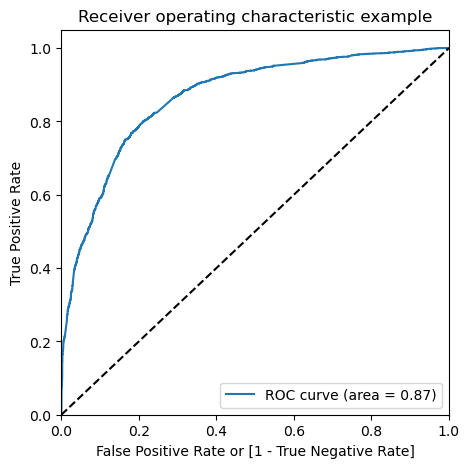

In [957]:

# Call the ROC function
draw_roc(y_train_pred_finaldf.Converted, y_train_pred_finaldf.Conversion_Prob)

The area under the curve of the ROC is 0.87 which is good to have. 

In [959]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_finaldf[i]= y_train_pred_finaldf.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_finaldf.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.373221,0,1,1,1,1,0,0,0,0,0,0
1,0,0.066358,0,1,0,0,0,0,0,0,0,0,0
2,0,0.563380,1,1,1,1,1,1,1,0,0,0,0
3,1,0.762384,1,1,1,1,1,1,1,1,1,0,0
4,1,0.378298,0,1,1,1,1,0,0,0,0,0,0


In [960]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob_cutoff','accuracy','sensitivity','specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_finaldf.Converted, y_train_pred_finaldf[i] )
    total=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob_cutoff  accuracy  sensitivity  specificity
0.0          0.0  0.482395     1.000000     0.000000
0.1          0.1  0.576362     0.985123     0.195407
0.2          0.2  0.705315     0.945607     0.481369
0.3          0.3  0.768782     0.905160     0.641681
0.4          0.4  0.791657     0.805207     0.779029
0.5          0.5  0.793676     0.750814     0.833622
0.6          0.6  0.765418     0.639238     0.883016
0.7          0.7  0.739852     0.549977     0.916811
0.8          0.8  0.710249     0.450023     0.952773
0.9          0.9  0.650146     0.294282     0.981802


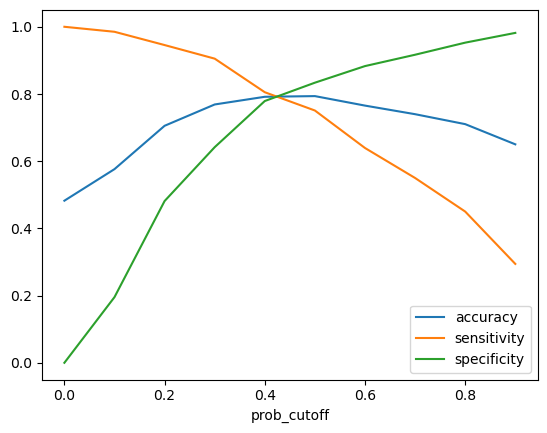

In [961]:
# Let's plot it as well
cutoff_df.plot.line(x='prob_cutoff', y =['accuracy','sensitivity','specificity'])
plt.show()

From the graph it is visible that the optimal cut off is at around 0.42

In [963]:
y_train_pred_finaldf['final_predicted'] = y_train_pred_finaldf.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_finaldf.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.373221,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.066358,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.563380,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.762384,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.378298,0,1,1,1,1,0,0,0,0,0,0,0


In [964]:
#Checking overall accuracy
metrics.accuracy_score(y_train_pred_finaldf.Converted, y_train_pred_finaldf.final_predicted)

0.793899977573447

In [965]:
#Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_finaldf.Converted, y_train_pred_finaldf.final_predicted)
confusion2

array([[1828,  480],
       [ 439, 1712]], dtype=int64)

In [966]:
# Evaluating other metrics

TP = confusion2[1,1] # For true positive 
TN = confusion2[0,0] # For true negatives
FP = confusion2[0,1] # For false positives
FN = confusion2[1,0] # For false negatives

sens = round(100*TP/(TP+FN),2)
spec = round(100*TN/(TN+FP),2)

print('Sensitivit : {0}%'.format(sens))
print('Specificity : {}%'.format(spec))

Sensitivit : 79.59%
Specificity : 79.2%


Having current cut off as 0.42 we have accuracy, sensitivity and specificity of around 79%.

## Test Set Prediction

In [969]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [970]:
# Substituting all the columns in the final train model
c = X_train.columns

In [971]:
# Select the columns in X_train for X_test as well
X_test = X_test[c]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[c])
X_test_sm
X_test_sm


,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed
5017,1.0,0.127273,0.039613,0.042364,0,0,0,0,0,0,0,0,1
5624,1.0,0.109091,0.070423,0.109091,0,0,0,0,1,0,0,0,1
3460,1.0,0.036364,0.290493,0.036364,0,0,0,0,1,0,0,0,1
2675,1.0,0.000000,0.000000,0.000000,1,0,0,0,0,0,1,0,0
4969,1.0,0.109091,0.414613,0.054545,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7541,1.0,0.072727,0.033891,0.036364,0,1,0,0,0,0,0,1,0
5194,1.0,0.145455,0.025528,0.072727,0,0,0,0,0,0,1,0,1
1021,1.0,0.163636,0.366637,0.163636,0,0,0,0,0,0,0,0,1
643,1.0,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,1


In [972]:
#Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_finaldf = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_finaldf= y_pred_finaldf.rename(columns = {0 : 'Conversion_Prob'})
y_pred_finaldf.head()

,Converted,Conversion_Prob
0,0,0.086280
1,0,0.144007
2,0,0.340094
3,1,0.995044
4,1,0.534512


In [973]:
# Making prediction using cut off 0.35
y_pred_finaldf['final_predicted'] = y_pred_finaldf.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_finaldf

,Converted,Conversion_Prob,final_predicted
0,0,0.086280,0
1,0,0.144007,0
2,0,0.340094,0
3,1,0.995044,1
4,1,0.534512,1
...,...,...,...
1907,0,0.269121,0
1908,1,0.330634,0
1909,1,0.183913,0
1910,1,0.181491,0


In [974]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_finaldf['Converted'], y_pred_finaldf.final_predicted)

0.7651673640167364

In [975]:
# Creating confusion matrix 
confusion3 = metrics.confusion_matrix(y_pred_finaldf['Converted'], y_pred_finaldf.final_predicted )
confusion3

array([[683, 315],
       [134, 780]], dtype=int64)

In [976]:
# Evaluating other metrics

TP = confusion3[1,1] # For true positive 
TN = confusion3[0,0] # For true negatives
FP = confusion3[0,1] # For false positives
FN = confusion3[1,0] # For false negatives

sens = round(100*TP/(TP+FN),2)
spec = round(100*TN/(TN+FP),2)

print('Sensitivit : {0}%'.format(sens))
print('Specificity : {}%'.format(spec))

Sensitivit : 85.34%
Specificity : 68.44%


## Precision ReCall

In [978]:
confusion = metrics.confusion_matrix(y_pred_finaldf['Converted'], y_pred_finaldf.final_predicted )
confusion

array([[683, 315],
       [134, 780]], dtype=int64)

In [979]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7123287671232876

In [980]:
precision = round(confusion[1,1]/(confusion[0,1]+confusion[1,1]) *100,2)
recall = round(confusion[1,1]/(confusion[1,0]+confusion[1,1]) *100,2)

print('Precision : {0}%'.format(precision))
print('Recall : {0}%'.format(recall))

Precision : 71.23%
Recall : 85.34%


## Precsion and Recall Tradeoff

In [982]:
y_train_pred_finaldf.Converted, y_train_pred_finaldf.Predicted

(0       1
 1       0
 2       0
 3       1
 4       1
        ..
 4454    1
 4455    0
 4456    0
 4457    0
 4458    1
 Name: Converted, Length: 4459, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       0
        ..
 4454    1
 4455    0
 4456    0
 4457    0
 4458    1
 Name: Predicted, Length: 4459, dtype: int64)

In [983]:
p, r, thresholds = precision_recall_curve(y_train_pred_finaldf.Converted, y_train_pred_finaldf.Conversion_Prob)

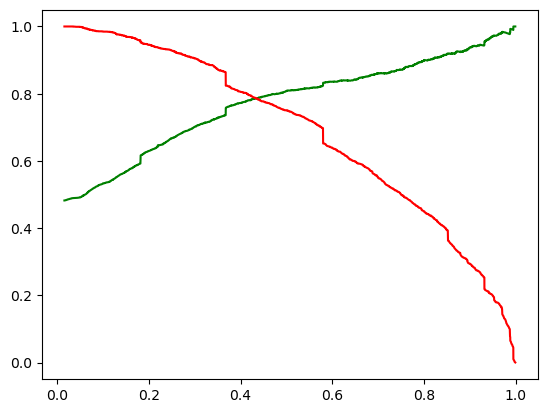

In [984]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [985]:
y_train_pred_finaldf['final_predicted'] = y_train_pred_finaldf.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_finaldf.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.373221,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.066358,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.563380,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.762384,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.378298,0,1,1,1,1,0,0,0,0,0,0,0


In [986]:
metrics.accuracy_score(y_train_pred_finaldf.Converted, y_train_pred_finaldf.final_predicted)
confusion2 = metrics.confusion_matrix(y_train_pred_finaldf.Converted, y_train_pred_finaldf.final_predicted )
confusion2
TP = confusion2[1,1]#true negatives
TN = confusion2[0,0]#true positives
FP = confusion2[0,1]#false positives
FN = confusion2[1,0]#false negatives

In [987]:
prec = round(100*TP / (TP + FP),2)
rec = round(100*TP / (TP + FN),2)

print('Precision : {0}%'.format(sens))
print('Recall : {}%'.format(spec))

Precision : 85.34%
Recall : 68.44%


Having the cutoff as 0.42, we have Precision aorund 77% and Recall around 80%

## Concluion

##### From the above we can conclude that priority of the dataset is as follows: 
1. The total time spend on the website
2. Total number of visits
3. When the lead source is:
   Google
4. When the last activity is:
   SMS
   Olark chat conversation
5. When the lead orogin is lead add format


#### Based on the above findings the X education can conclude that they have a very chance to get all the potential buyers to change their mind and buy thier courses